In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

## Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.


### Read the data

In [2]:
data1=pd.read_csv('../Datasets/50_Startups.csv')

In [3]:
data1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
data1.duplicated().sum()

0

In [8]:
data1=data1.rename({'R&D Spend':'RDS','Marketing Spend':'MPS'},axis=1)

In [9]:
data1.head()

,RDS,Administration,MPS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Corelation Matrix

In [10]:
data1.corr(numeric_only=True)

,RDS,Administration,MPS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MPS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Scatterplot between variables along with histograms

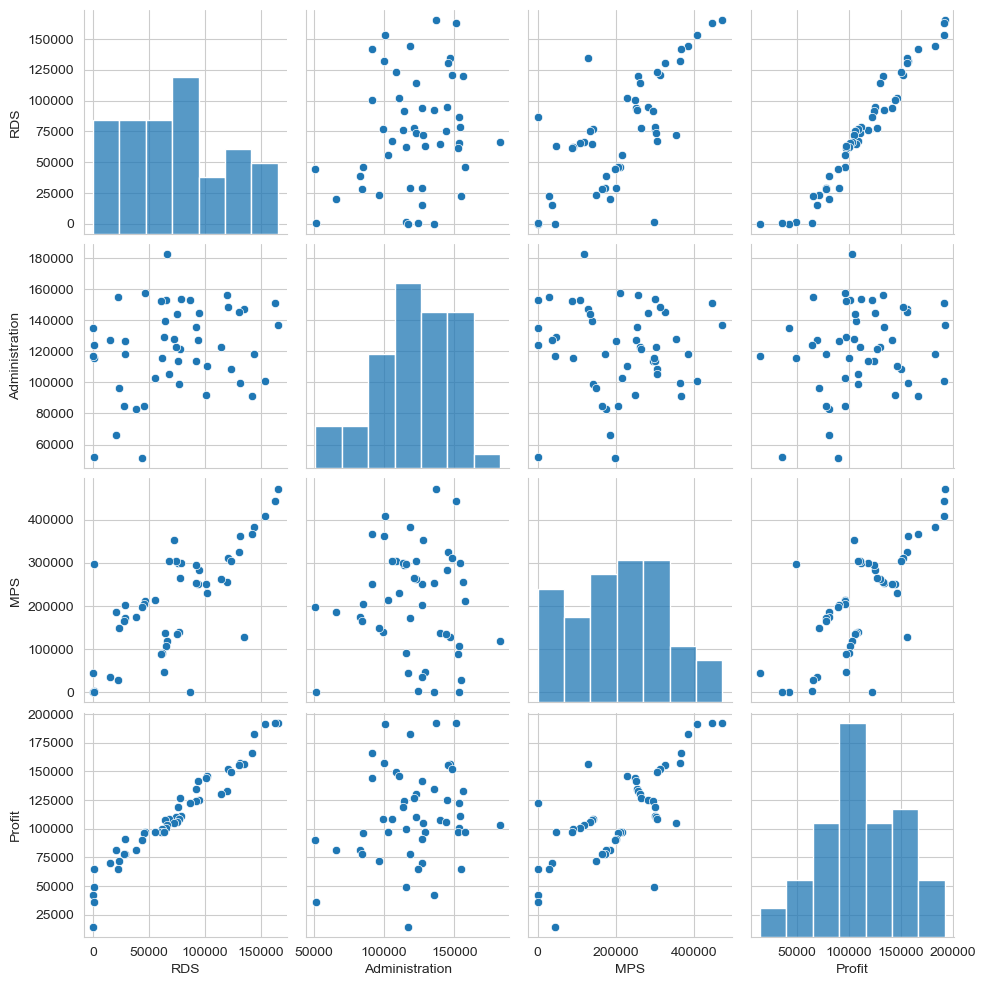

In [11]:
sns.set_style(style='whitegrid')
sns.pairplot(data1)
plt.show()

In [12]:
model=smf.ols('Profit~RDS+Administration+MPS', data=data1).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           4.53e-30
Time:                        11:12:01   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MPS                0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Testing

In [14]:
model.params

Intercept         50122.192990
RDS                   0.805715
Administration       -0.026816
MPS                   0.027228
dtype: float64

### Finding T and P values

In [15]:
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
RDS               17.846374
Administration    -0.525507
MPS                1.655077
dtype: float64 
 Intercept         1.057379e-09
RDS               2.634968e-22
Administration    6.017551e-01
MPS               1.047168e-01
dtype: float64


### Finding R squared values

In [16]:
print(model.rsquared,'\n',model.rsquared_adj)

0.9507459940683246 
 0.9475337762901719


### Build SLR and MLR models for insignificant variables 'Administraton' and 'MPS'
### finding t and p values

In [17]:
slr=smf.ols('Profit~Administration',data=data1).fit()

In [18]:
slr.tvalues

Intercept         3.040044
Administration    1.419493
dtype: float64

In [19]:
slr.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

In [20]:
slr1=smf.ols('Profit~MPS',data=data1).fit()

In [21]:
slr1.tvalues

Intercept    7.808356
MPS          7.802657
dtype: float64

In [22]:
slr1.pvalues

Intercept    4.294735e-10
MPS          4.381073e-10
dtype: float64

In [23]:
mlr=smf.ols('Profit~Administration+MPS',data=data1).fit()

In [24]:
mlr.tvalues,mlr.pvalues

(Intercept         1.142741
 Administration    2.467779
 MPS               8.281039
 dtype: float64,
 Intercept         2.589341e-01
 Administration    1.729198e-02
 MPS               9.727245e-11
 dtype: float64)

### Model Validation

In [25]:
### Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols('RDS~Administration+MPS',data=data1).fit().rsquared
vif_1=1/(1-rsq_r)

rsq_a=smf.ols('Administration~RDS+MPS',data=data1).fit().rsquared
vif_2=1/(1-rsq_a)

rsq_m=smf.ols('MPS~RDS+Administration',data=data1).fit().rsquared
vif_3=1/(1-rsq_m)

In [26]:
### Putting the values in DataFrame

df1={'variables':['RDS','Administration','MPS'],'Vif':[vif_1,vif_2,vif_3]}
Vdf=pd.DataFrame(df1)
Vdf

,variables,Vif
0,RDS,2.468903
1,Administration,1.175091
2,MPS,2.326773


### Since No value of VIF is greater than 20 , we can say that there is no collinearity problem. So we shall consider all columns for building the model

## Residual Analysis
## Test for Normality of Residuals (Q-Q Plot)

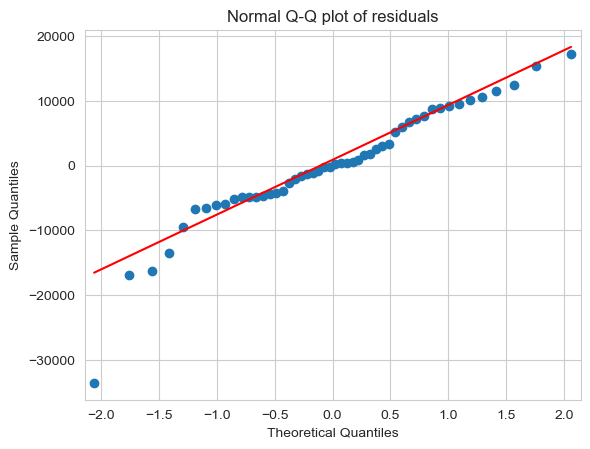

In [27]:
sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [28]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

#### Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual)

In [29]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

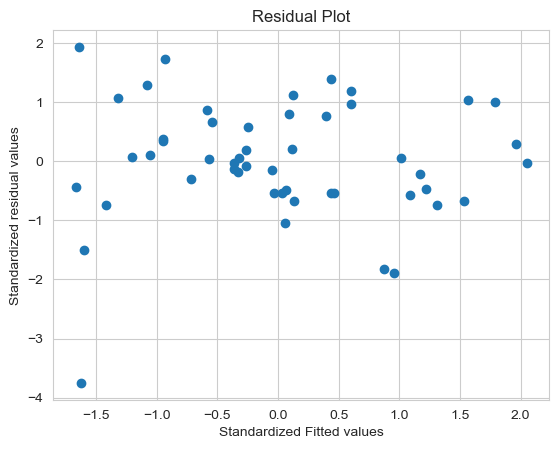

In [30]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual Vs Regressors

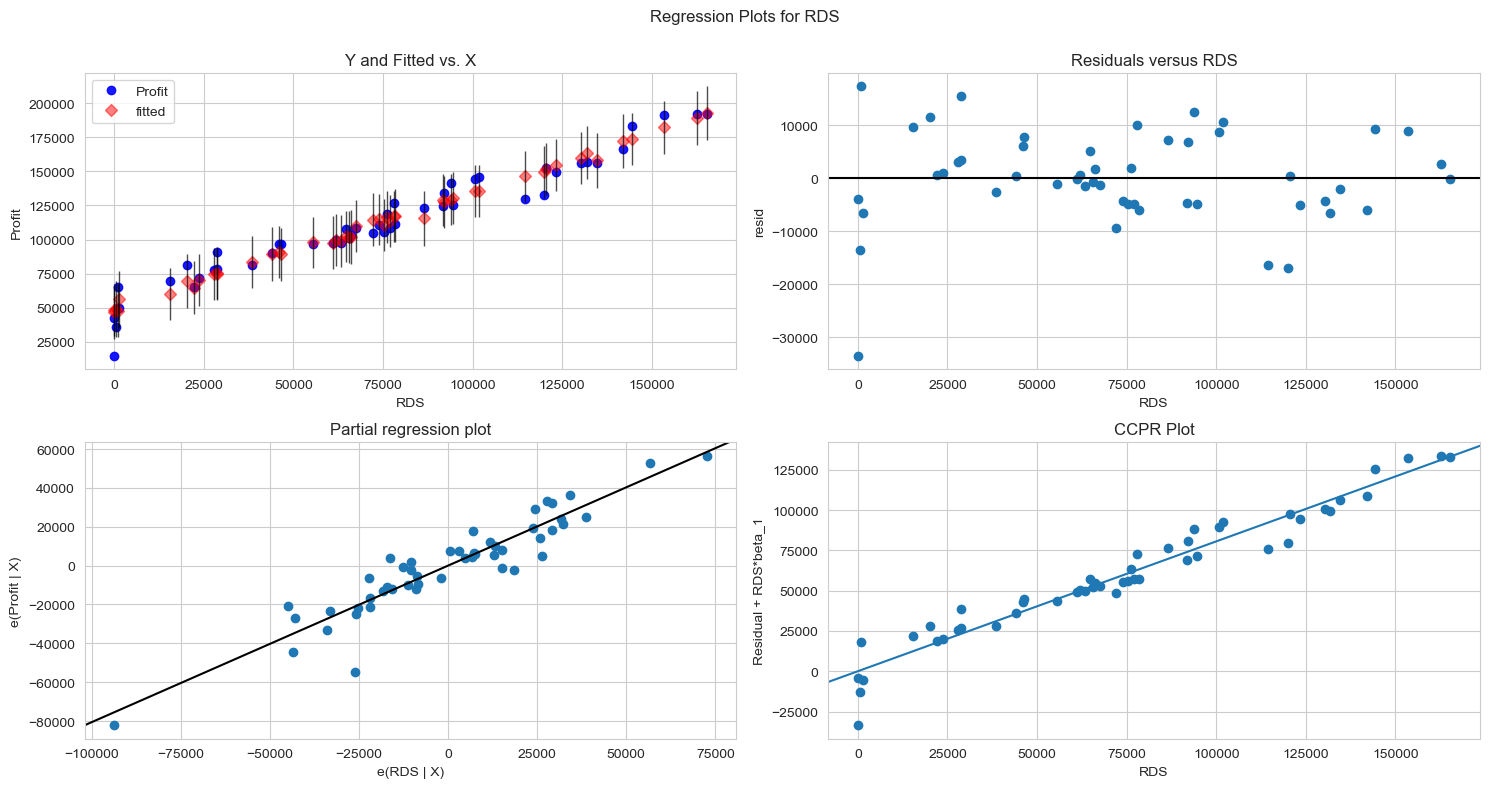

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

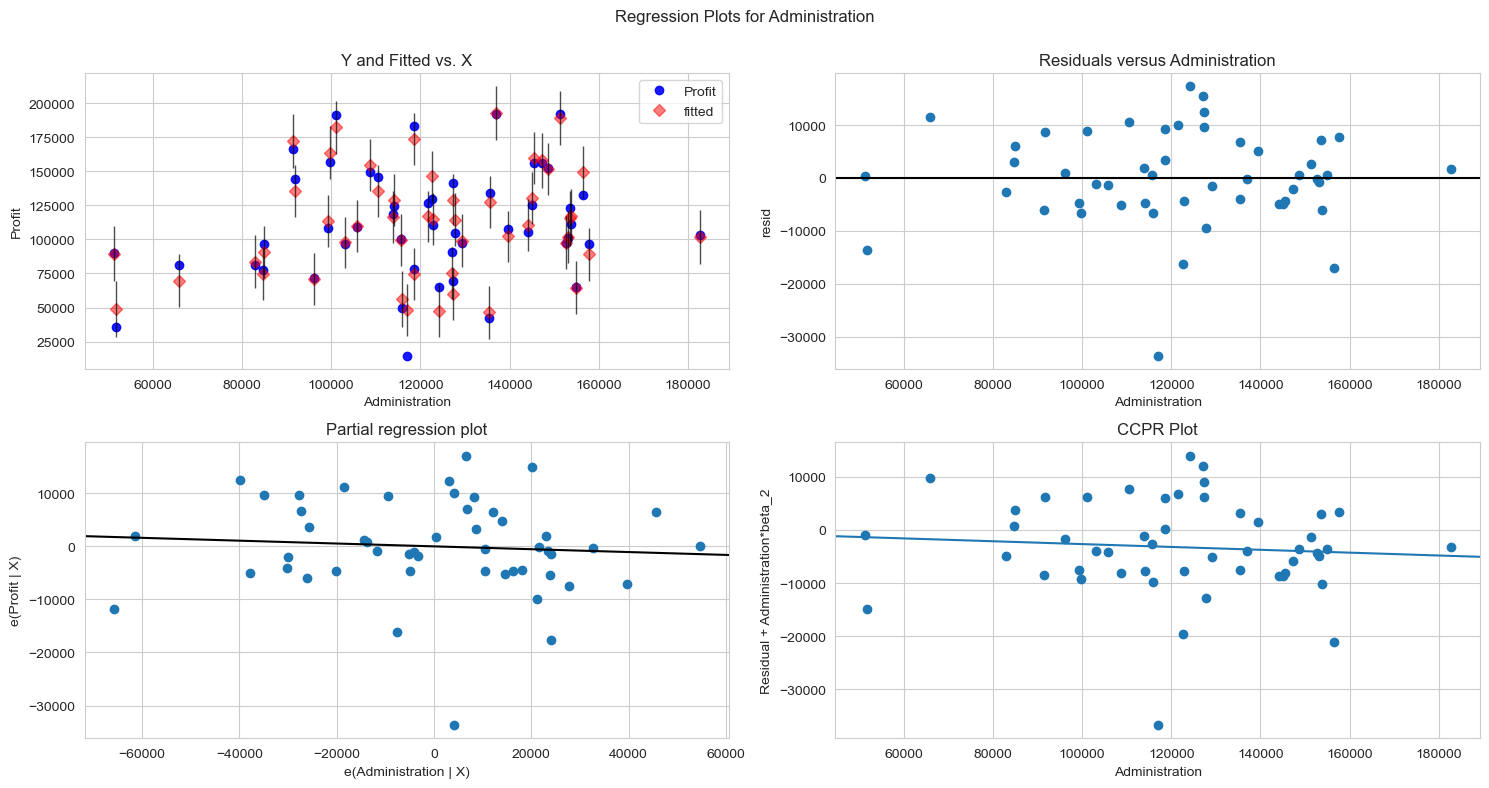

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

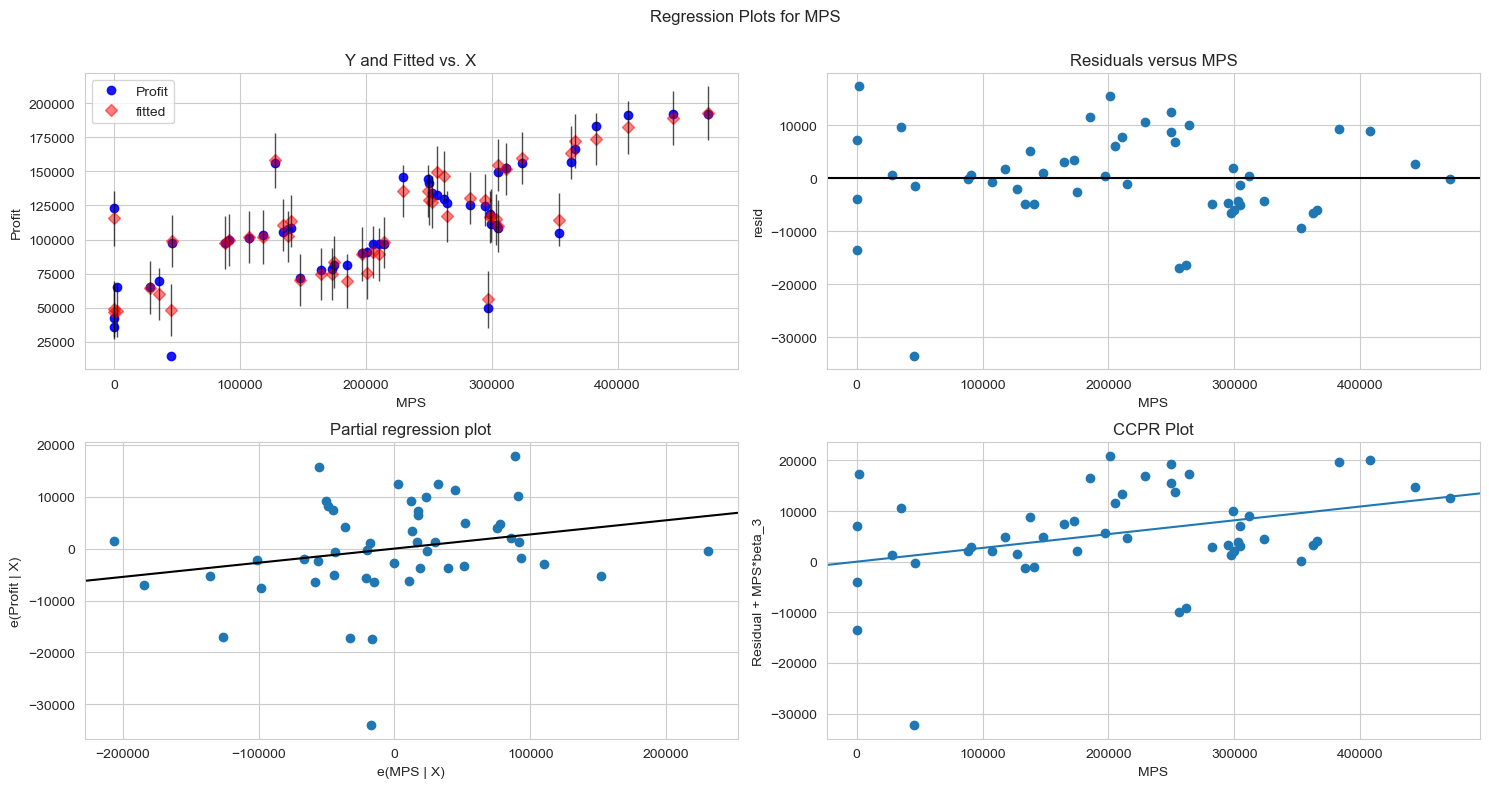

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MPS',fig=fig)
plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)
### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [34]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

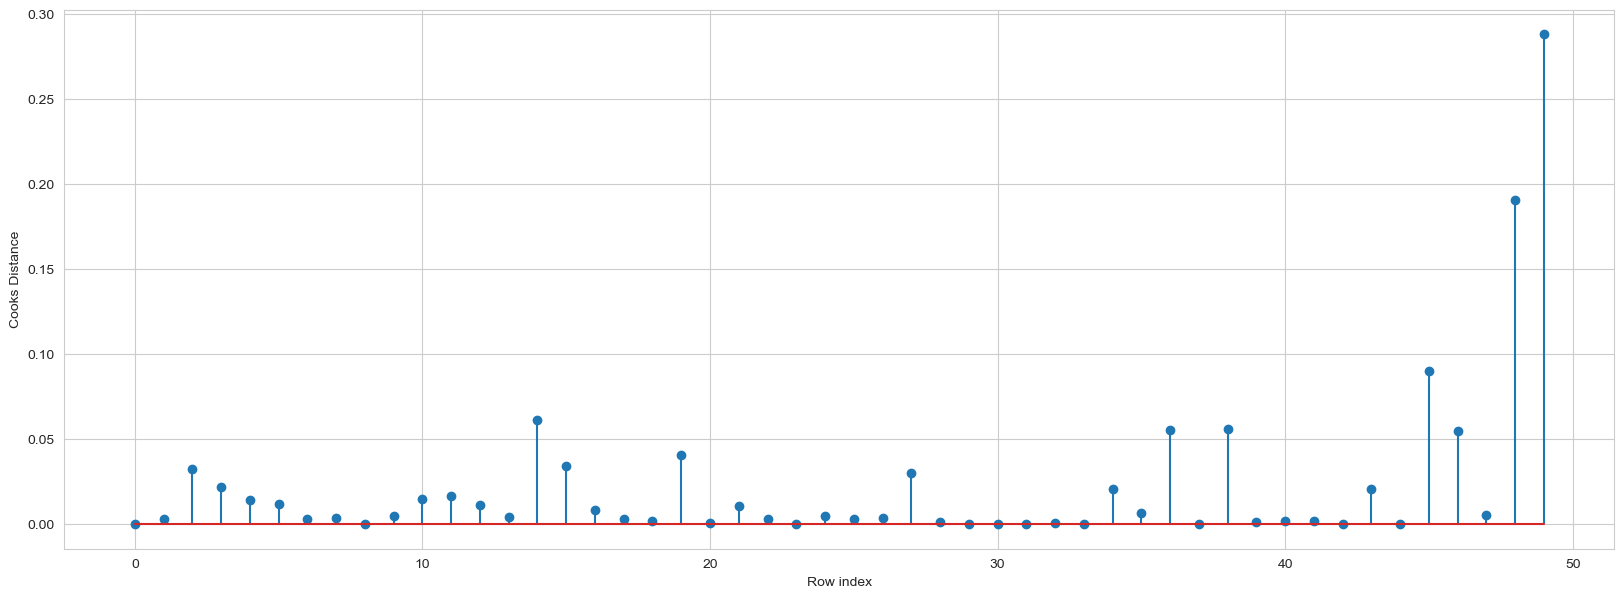

In [35]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432656)

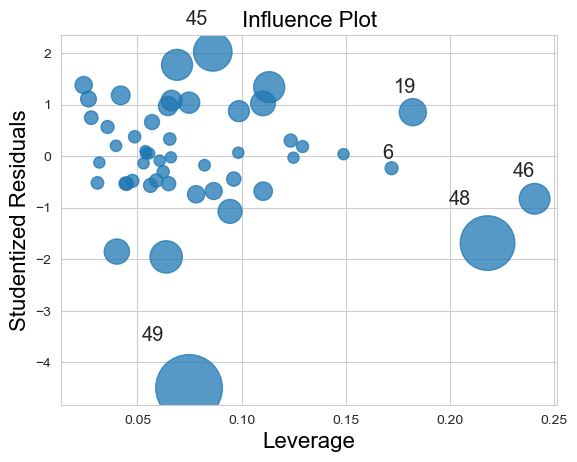

In [37]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [38]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [39]:
data1[data1.index.isin([49])] 

,RDS,Administration,MPS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


## Improving the Model

In [40]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2.head()

,RDS,Administration,MPS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Model Deletion Diagnostics and Final Model

In [41]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+Administration+MPS",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RDS+Administration+MPS",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [42]:
final_model.rsquared

0.9613162435129847

In [43]:
data2.head()

,RDS,Administration,MPS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Model Predictions

In [44]:
new_data=pd.DataFrame({'RDS':70000,"Administration":90000,"MPS":140000},index=[0])
new_data

,RDS,Administration,MPS
0,70000,90000,140000


In [45]:
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [46]:
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

## Table containing R^2 value for each prepared model

In [47]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
